# Using Auroral Viewer
#### The following notebook contains examples of using the auroral view code provided by fuvpy. The auroral viewer enables interactive polar plots and adjustable colorbars through interaction

## Imports

In [1]:
%matplotlib notebook
from fuvpy.Viewer import Visualise
import matplotlib.pyplot as plt
from polplot.polplot import Polarplot as polar
import numpy as np

## Setting Up example figure with one polar subplot and one colorbar axis

<IPython.core.display.Javascript object>


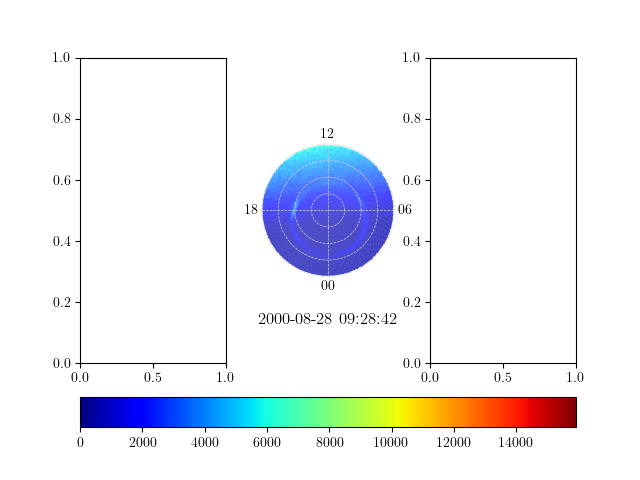

In [2]:
fig=plt.figure('Single ax Example')
gs= fig.add_gridspec(2, 3, height_ratios=[1, .1])
MLTax= fig.add_subplot(gs[0, 0])
MLATax=fig.add_subplot(gs[0, 2])
ax=polar(fig.add_subplot(gs[0, 1]))
cax=fig.add_subplot(gs[1, :])
ax.writeMLTlabels()

## Selecting a file and initialising the visualisation code
Files can either be idl or xarray. The in_put argument specified which parameter will be used for the color. The mlt and mlat co-ordinates are assumed to be of the format 'mlt' and 'mlat'.

In [3]:
file= '../data/wicFiles/wic20002410928.idl'
vis= Visualise(fig, ax, cax, MLTax, MLATax)

## Plotting the selected image using defualts

In [4]:
vis.show_image(file, ax)

(<matplotlib.collections.PolyCollection at 0x7fb19d264610>,
 <matplotlib.colorbar.Colorbar at 0x7fb19bd77040>)

## Second example using multiple polar subplots and colorbar axes

<IPython.core.display.Javascript object>


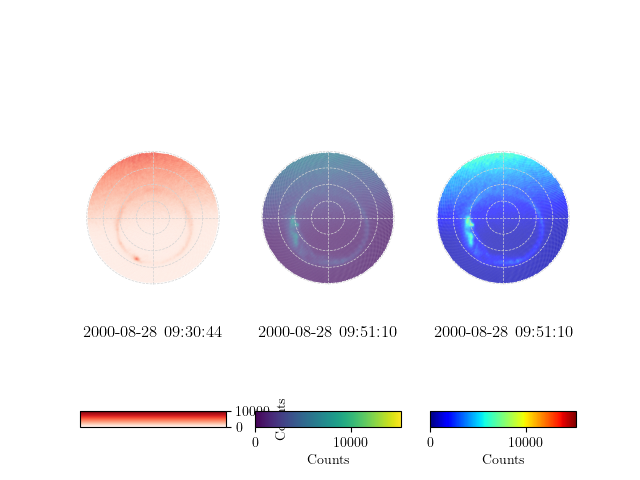

In [5]:
fig=plt.figure('Multiple ax Example')
gs= fig.add_gridspec(2, 3, height_ratios=[1, .05])
ax=polar(fig.add_subplot(gs[0, 0]))
ax2=polar(fig.add_subplot(gs[0, 1]))
ax3=polar(fig.add_subplot(gs[0, 2]))
cax=fig.add_subplot(gs[1, 0])
cax2=fig.add_subplot(gs[1, 1])
cax3=fig.add_subplot(gs[1, 2])

## Initialising the visualisation
When using more than one colorbar axis then cax_association should be specified. This is enables the code to know which polarsubplots are associated with which colorbar. This is neccassary because multilple polarsubplots can use the same colorbar and as a result should share the same scales and be adjusted when the colorbar is interacted with.

In [6]:
vis= Visualise(fig, [ax, ax2, ax3], [cax, cax2, cax3], cax_association=[0, 1, 2])

## Selecting files and showing them
The show_image function returns the plotted object and the cbar. This allows the cbar to be interacted with, such as adding a label.

In [7]:
file= '../data/wicFiles/wic20002410930.idl'
file2= '../data/wicFiles/wic20002410951.idl'
file3= '../data/wicFiles/wic20002410951.idl'
im, cbar1= vis.show_image(file, ax)
im2, cbar2= vis.show_image(file2, ax2, cmap='viridis')
im3, cbar3= vis.show_image(file3, ax3)
for cbar in [cbar1, cbar2, cbar3]:
    cbar.set_label('Counts')

## Plotting a new image
Plotting a new image is a simple as running the code again with a new file and if a new color map or color range is specified then all polarsubplots are adjusted accordingly. Orientation of the colorbar can also be alterered when replotting.

In [8]:
im, cbar= vis.show_image(file, ax, cmap='Reds', crange=(0, 10000), cbar_orientation='vertical')